In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import neuralnets as nn
import utils

# Set seed
np.random.seed(42)

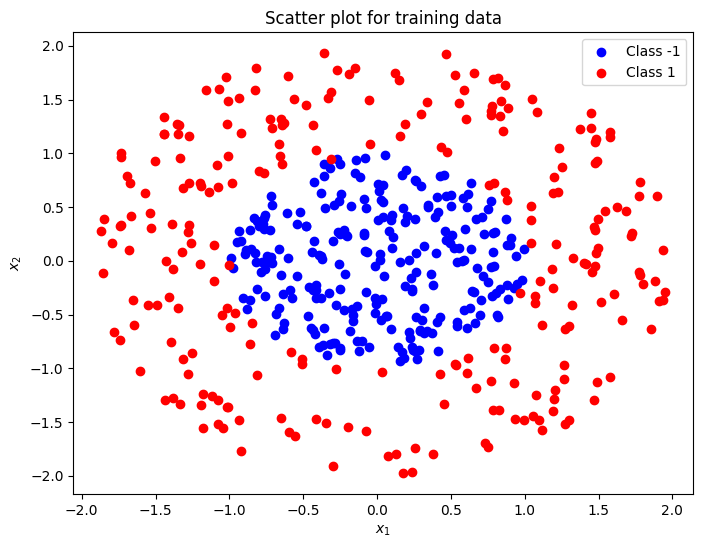

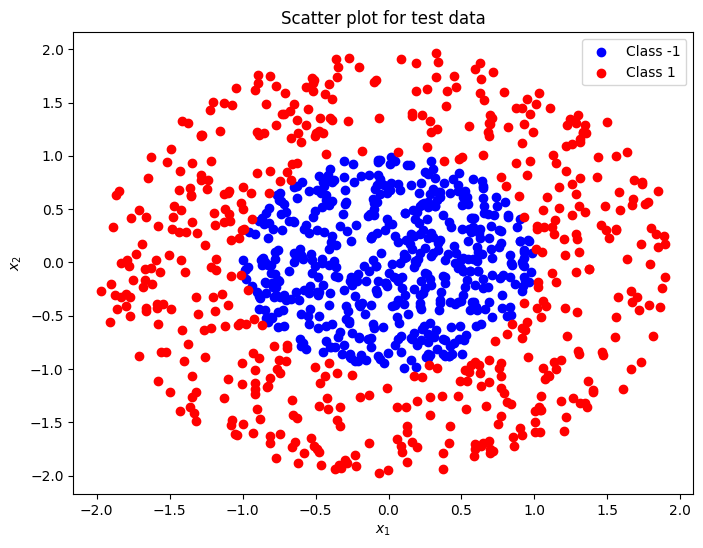

In [2]:
# Generate the training data
X_train, y_train = utils.generate_circle_data(n_positive=250, n_negative=250)
# Generate the test data
X_test, y_test = utils.generate_circle_data(n_positive=500, n_negative=500)

# Plot the training data set 
utils.scatterplot_features(X_train, y_train, title = 'Scatter plot for training data')
# Plot the test data set 
utils.scatterplot_features(X_test, y_test, title = 'Scatter plot for test data')


In [3]:
# Set parameters for the Neural Network
d1 = 2          # Initial Layer Dimension   
d2 = 20         # Hidden Layer Dimension
d3 = 1          # Output Layer Dimension
dims = [d1, d2, d3]

K = 20          # Batch Size for stochastic gradient descent
S = 50000       # Number of iterations
nu = 0.001       # Learning rate for NN

# Generate an instance of the the parameters
params = nn.TwoLayerNNParameters(dims, nu, S, K)
print(params)

# Create an instance of the Two Layer NN
NN = nn.TwoLayerNN(parameters = params)

# Train the Two Layer NN with the data X and y
W, b = NN.train(X_train, y_train)


TwoLayerNNParameters:
  dims: [2, 20, 1]
  learning rate (nu): 0.001
  iterations (S): 50000
  batch size (K): 20
Least Squares Error after 0 iterations: 2.871009509309939
Least Squares Error after 5000 iterations: 1.6300159839722739
Least Squares Error after 10000 iterations: 1.7272470591369011
Least Squares Error after 15000 iterations: 1.8976810975421676
Least Squares Error after 20000 iterations: 1.5476859814720012
Least Squares Error after 25000 iterations: 1.7837237199603055
Least Squares Error after 30000 iterations: 1.926410730047593
Least Squares Error after 35000 iterations: 1.511333789805886
Least Squares Error after 40000 iterations: 1.6684894318361858
Least Squares Error after 45000 iterations: 1.854414526909913


In [4]:

y_predicted_label_train = np.sign(NN.predict(W, b, X_train))
acc_train = utils.accuracy(y_predicted_label_train, y_train)
y_predicted_label_test = np.sign(NN.predict(W, b, X_test))
acc_test = utils.accuracy(y_predicted_label_test, y_test)

print('Accuracy of the Classification by Two Layer NN')
print('----------------------------------')
print(f'Accuracy on the trainig data: {acc_train*100:.2f}%')
print(f'Accuracy on the test data: {acc_test*100:.2f}%')


Accuracy of the Classification by Two Layer NN
----------------------------------
Accuracy on the trainig data: 96.00%
Accuracy on the test data: 95.20%


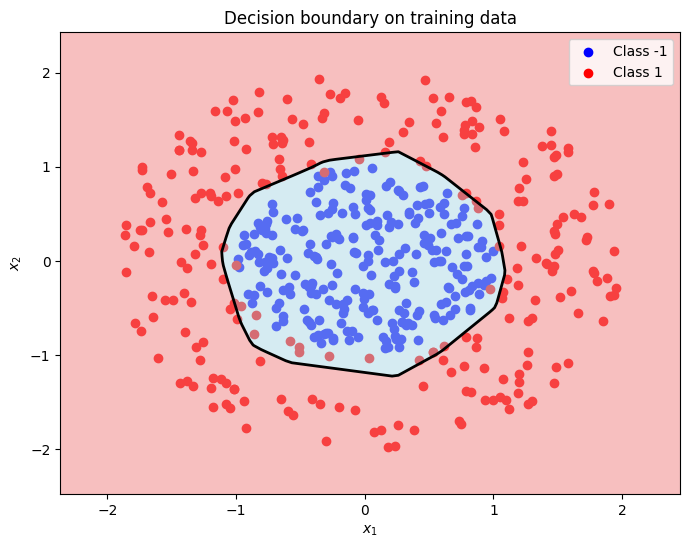

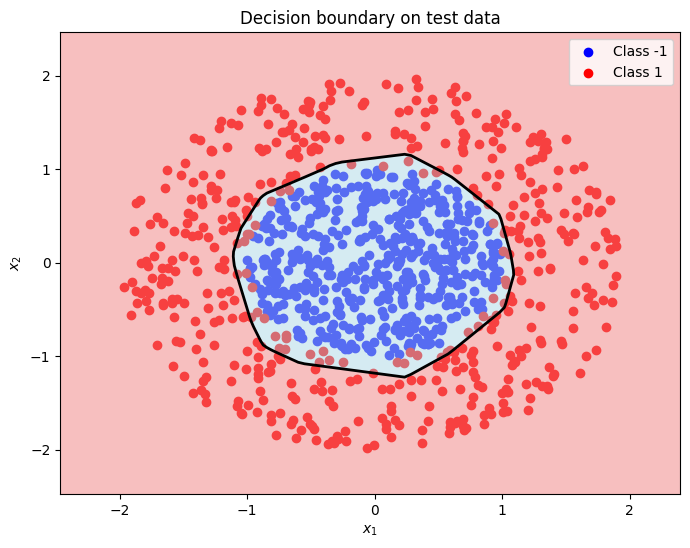

In [5]:
# Plot the plot decision boundary on the training data set
utils.plot_decision_boundary(NN, W, b, X_train, y_train, title = 'Decision boundary on training data')
utils.plot_decision_boundary(NN, W, b, X_test, y_test, title = 'Decision boundary on test data')

In [11]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
import tensorflow.keras.layers as layers

2025-06-03 11:16:47.466522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


In [13]:
def plot_history(history):
    x = range(history.params['epochs'])
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_title('accuracy')
    axarr[0].plot(x, acc, label='train')
    axarr[0].plot(x, val_acc, label='validation')
    axarr[0].legend()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    axarr[1].set_title('loss')
    axarr[1].plot(x, loss, label='train')
    axarr[1].plot(x, val_loss, label='validation')
    axarr[1].legend()

In [ ]:
model1 = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='tanh')
])

model1.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Model Architecture:")
model1.summary()

print("\nTraining...")
history1 = model1.fit(
    X_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred_test = model1.predict(X_test, verbose=0)
y_pred_labels_test = np.sign(y_pred_test)

accuracy_test = utils.accuracy(y_pred_labels_test, y_test)
print(f"\nTest Accuracy: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
plot_history(history1)



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)


Training...
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 1.1431 - mae: 1.0399 - val_loss: 1.1335 - val_mae: 1.0402
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.0374 - mae: 1.0008 - val_loss: 1.0847 - val_mae: 1.0226
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.0169 - mae: 0.9910 - val_loss: 1.0353 - val_mae: 1.0027
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9878 - mae: 0.9780 - val_loss: 0.9949 - val_mae: 0.9842
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.9516 - mae: 0.9614 - val_loss: 0.9628 - val_mae: 0.9684
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.9397 - mae: 0.9566 - val_loss: 0.9348 - val_mae: 0.9548
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.9046 - mae: 0.9388 - val_loss: 0.9083 - val_mae: 0.9411
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.8648 - mae: 0.9162 - val_loss: 0.8819 - val_mae: 0.9263
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
model2 = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(128, activation='tanh')
])

model2.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mae']
)

print("Model Architecture:")
model2.summary()

K = 20
S = 50000

print("\nTraining...")
history2 = model2.fit(
    X_train, y_train, 
    batch_size=K, 
    epochs=int(S / (500 / K)), 
    validation_data=(X_test, y_test),
    verbose=True)

y_pred_test = model2.predict(X_test, verbose=0)
y_pred_labels_test = np.sign(y_pred_test)

accuracy_test = utils.accuracy(y_pred_labels_test, y_test)
print(f"\nTest Accuracy: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
plot_history(history2)

In [ ]:

class TwoLayerNNParameters: 
    def __init__(self, dims, nu, S, K):
        self.dims = dims            # Domain length in x
        self.nu = nu            # Domain length in y
        self.S = S                # Grid spacing
        self.K = K
        
class TwoLayerNN:

    """
    A class representing a two-layer fully connected neural network, 
    trained using Stochastic Gradient Descent and ReLU activation.

    This network consists of:
    - An input layer
    - One hidden layer with ReLU activation
    - A linear output layer

    Parameters
    ----------
    nu : float
        Learning rate used in the stochastic gradient descent.
    K : int
        Mini-batch size used during training.
    dims : list of int
        A list specifying the number of neurons in each layer: [input_dim, hidden_dim, output_dim].
    S : int
        Number of training iterations (steps of SGD).

    Attributes
    ----------
    phi : list of callable
        Activation functions used in the network; ReLU for hidden layer, identity for output.
    phi_prime : list of callable
        Derivatives of activation functions for use in backpropagation.

    Methods
    -------
    feedForward(W, b, z):
        Computes forward pass for a single input example.
    
    feedForward_batch(W, b, Z):
        Computes forward pass for a batch of input examples.
    
    backpropagation(W, b, z, y):
        Computes gradients for a single training example via backpropagation.
    
    backpropagation_batch(W, b, Z):
        Placeholder for batch backpropagation (not yet implemented).
    
    sample_minibatch(Z, y, K):
        Randomly samples a mini-batch of size K from the dataset.

    least_squares_error(y_pred, y_true):
        Computes mean squared error between predictions and targets.
    
    train():
        Trains the neural network using SGD on the provided data.
    
    predict(W, b, Z):
        Performs prediction using trained weights and biases on new input data.
    """

    
    def __init__(self, parameters: TwoLayerNNParameters):

        self.nu = parameters.nu
        self.K = parameters.K 
        self.S = parameters.S
        self.dims = parameters.dims

        # Define the activation functions and derivatives for the two layer NN
        def phi_2(z):
            return np.maximum(z, 0)
        def phi_3(z):
            return z
        def phi_2_prime(z):
            return (z >= 0).astype(int)
        def phi_3_prime(z):
            return 1

        # Collect activation functions phi_i into a list
        self.phi = [phi_2, phi_3]
        self.phi_prime = [phi_2_prime, phi_3_prime]

    def feedForward_batch(self, W, b, Z):
        """
        Computes the feed forward for a two layer neural network
    
        Parameters
        ----------
        W: List of NumPy arrays, 
            W[0] is a weight matrix for layer l=1 of shape (d1, d2), W[1] is a weight matrix for layer l=2 of shape (d2, d),
        b: List of NumPy arrays
            Each b[l] is a bias vector for layer l of shape (d_{l},)
        phi: List of functions
            Activation functions for the hidden layer and output layer
        Z: (K,d1) NumPy array
            Input vector of shape (d1,)

        Returns
        -------
        o : NumPy array
            Output of the final layer after applying all weights, biases and activations
        net_vals: list 
            List of NumPy arrays
        o_vals: list
            List of NumPy arrays 

        """

        o1 = Z
        net2 = o1 @ W[0] + b[0]     # Shape: (batch_size, d2)
        o2 = self.phi[0](net2)      # Shape: (batch_size, d2)
        net3 = o2 @ W[1] + b[1]     # Shape: (batch_size, 1)
        o3 = net3                   # Shape: (batch_size, 1)
        output = o3.copy()
        o_vals = [o1, o2, o3]
        net_vals = [net2, net3]
    
        return output, net_vals, o_vals
 
    def backpropagation_batch(self, W, b, Z, y):
        '''
        Parameters
        ----------
        W: list of weights (W[0]: (d1, d2), W[1]: (d2, d3))
        b: list of biases (b[0]: (d2,), b[1]: (d3,))
        Z_batch: (N, d1) input batch
        Y_batch: (N, d3) output batch

        Returns
        -------
        grad_W: list of gradients for weights
        grad_b: list of gradients for biases
        '''
        n_obs = Z.shape[0]

        f_z, net_vals, o_vals = self.feedForward_batch(W, b, Z)
        #print(f_z.shape)
        #print(y.shape)
        # Compute deltas
        delta2 = 2 * (f_z - y.reshape((n_obs,1)))          # Shape: (N, d3)
        #print('Shape delta2', delta2.shape)
        delta1 = (delta2 @ W[1].T)      # Shape: (N, d2)

        net2 = net_vals[0]
        o2 = o_vals[1]

        # Gradients
        delta_1_active = (delta1*((net2 >= 0)))
        grad_W2 = (o2.T @ delta2) / n_obs                       # Shape: (d2, d3)
        grad_W1 = (Z.T @ delta_1_active) / n_obs                # Shape: (d1, d2)

        grad_b3 = np.mean(delta2, axis=0)                       # Shape: (d3,)            
        grad_b2 = np.mean(delta_1_active, axis=0)               # Shape: (d2,)

        grad_W = [grad_W1, grad_W2]
        grad_b = [grad_b2, grad_b3]

        return grad_W, grad_b


    def sample_minibatch(self, Z, y, K):
        '''
        Function to randomly sample a batch of size K from a data set

        Parameters
        ----------
        X: (n_obs, n_features) NumPy array, 
            Data set of features
        y: (n_obs, ) NumPy array
            Data set of labels
        K: int
            Size of mini batch
    
        Returns
        -------
        X_batch: (K, n_features) NumPy array, 
        y_batch: (n_obs, ) NumPy array
        '''
        # Number of observations
        n_obs = Z.shape[0]
    
        # Draw the batch indices in the iteration s
        batch_indices = np.random.randint(0, n_obs, size = K)
        # Extract the data points for the batch from the data set X
        X_batch = Z[batch_indices]
        # Extract the labels for the batch from y
        y_batch = y[batch_indices]

        return X_batch, y_batch
    

    def least_squares_error(self, y_pred, y_true):
        ''''
        Function to compute the least_squares_error
        '''
        loss = np.mean((y_pred - y_true)**2)
        return loss 
    

    def initialize_parameters(self):
        """
        Initializes the weights and biases for a two-layer fully connected neural network.

        The network consists of:
        - An input layer with dimension d1
        - A hidden layer with dimension d2 and ReLU activation
        - An output layer with dimension d3 and linear activation

        Weights are initialized uniformly in the range [-1, 1], and biases are initialized similarly.

        Returns
        -------
        W : list of np.ndarray
            List containing weight matrices:
            - W[0]: shape (d1, d2), weights from input to hidden layer
            - W[1]: shape (d2, d3), weights from hidden to output layer
        b : list of np.ndarray
            List containing bias vectors:
            - b[0]: shape (d2,), biases for hidden layer
            - b[1]: shape (d3,), biases for output layer
        """
        
        d1 = self.dims[0]
        d2 = self.dims[1]
        d3 = self.dims[2]

        # Initial layer
        W1 = np.random.uniform(-1,1, (d1, d2))
        b1 = np.random.uniform(-1,1, (d2,))
        # Hidden layer
        W2 =  np.random.uniform(-1,1, (d2, d3))
        b2 = np.random.uniform(-1,1, (d3,))

        # Store the initialized weight matrix and bias in arrays
        W = [W1, W2]
        b = [b1, b2]
        return W, b
    

    def train(self, X, y):

        '''
        Trains the 2 Layer Neural Net by Stochastic Gradient Descent
    
        Returns
        -------
        W: List of NumPy arrays, 
            W[0] is a weight matrix for layer l=1 of shape (d1, d2), W[1] is a weight matrix for layer l=2 of shape (d2, d),
        b: List of NumPy arrays
            Each b[l] is a bias vector for layer l of shape (d_{l},)
        '''

        nu = self.nu
        K = self.K
        S = self.S

        # Initialize the weight matrix and the bias b
        W, b = self.initialize_parameters()
    
        for s in range(S): 

            # Sample the mini batch of size K
            X_batch, y_batch = self.sample_minibatch(X, y, K)
            grad_W_C, grad_b_C =  self.backpropagation_batch(W, b, X_batch, y_batch)

            for l in range(0,2):
                # Update the weight matrix W and bias b for layer l
                W[l] -= nu*grad_W_C[l]
                b[l] -=  nu*grad_b_C[l]

            if s % 5000 == 0:
                y_pred = self.predict(W, b, X)
                print(f"Least Squares Error after {s} iterations: {self.least_squares_error(y_pred, y)}")

        return W, b
    
    def predict(self, W, b, Z): 

        '''
        Parameters
        ----------
        W: List of NumPy arrays
            Each W[l] is a weight matrix for layer l of shape (d_{l}, d_{l+1})
        b: List of NumPy arrays
            Each b[l] is a bias vector for layer l of shape (d_{l},)
        Z: (n_obs, n_features) NumPy array, 
            Data set of features
        
        Returns
        -------
        y_predict: NumPy array, shape (n_obs,)
            Predicted output values 
        '''
        y_predicted = self.feedForward_batch(W, b, Z)[0]
        return y_predicted
    

    def confusion_matrix(self, y_predicted, y_true):

        """
        Confusion matrix for classification

        *Args: 
            X: Input data, shape (n_samples, n_features)
            y: Target labels, shape (n_samples,)
            alpha: Coefficient vector (n_features,)
            threshold: Threshold value for decision boundary, float

        Returns: 
            C: Confusion matrix (2,2)
        """

        f = self.f

        n_obs_test = y_predicted.shape[0]
        # Generate the 2x2 confusion matrix
        C = np.zeros((2, 2), dtype = int)

        for i in range(n_obs_test): 
            if (y_predicted[i] == -1 and y_true[i] == -1):
                C[0,0] +=1
            if (y_predicted[i] == -1 and y_true[i] == 1):
                C[0,1] +=1
            if (y_predicted[i] == 1 and y_true[i] == -1):
                C[1,0] +=1
            if (y_predicted[i] == 1 and y_true[i] == 1):
                C[1,1] +=1

        return C
    
    def accuracy(self, y_predicted, y_true):

        """
        Accuracy for from confusion matrix for classification

        *Args: 
            C: Confusion matrix, shape (n_features, n_features)
        Returns: 
            accuracy, float
        """
        C = self.confusion_matrix(self, y_predicted, y_true)
        return np.trace(C)/np.sum(C)

In [ ]:
# Define the activation functions
def phi_1(z):
    return z

def phi_2(z):
    return np.maximum(z, 0)

def phi_3(z):
    return z

def phi_2_derivative(z):
    return (z >= 0).astype(int)

def phi_3_derivative(z):
    return 1

# Put the activation function phi_i into a list
phi = [phi_2, phi_3]
phi_derivative = [phi_2_derivative, phi_3_derivative]


def feedForward(W, b, phi, z):
    """
    Computes the feed forward for a two layer neural network
    
    Parameters
    ----------
    W: List of NumPy arrays, 
        W[0] is a weight matrix for layer l=1 of shape (d1, d2), W[1] is a weight matrix for layer l=2 of shape (d2, d),
    b: List of NumPy arrays
        Each b[l] is a bias vector for layer l of shape (d_{l},)
    phi: List of functions
        Activation functions for the hidden layer and output layer
    z: (d1, ) NumPy array
        Input vector of shape (d1,)

    Returns
    -------
    o : NumPy array
        Output of the final layer after applying all weights, biases and activations

    net_vals:
    
    o_vals: 
    
    """

    # Initialize the values for the Input layer
    o = z
    net_vals = [None]*2
    o_vals = [None]*3
    o_vals[0] = o
    for l in range(2):
        net = np.dot(W[l].T, o) + b[l]
        net_vals[l]= net
        # Apply activation function to net (Understood component wise)
        o_new = phi[l](net)
        o = o_new
        o_vals[l+1] = o

    # Reshape lists into array
    #net_vals = np.array(net_vals, dtype = object)
    #o_vals = np.array(o_vals, dtype = object)
    
    return o, net_vals, o_vals


def backpropagation(W, b, phi, z, y, phi_prime = None):

    '''
    Function to compute the backpropagation 
    Parameters
    ----------
    W: (2, ) NumPy array, 
        Each W[l] is a weight matrix for layer l of shape (d_{l}, d_{l+1})
    b: (2, ) NumPy array
        Each b[l] is a bias vector for layer l of shape (d_{l},)
    phi: List of functions
        Activation functions for each layer l=1,2
    z: (d, ) NumPy array
        Input vector of shape (d,)
    y: float
        output value 
    
    Returns
    -------
    grad_W: list of np.ndarray
        Gradients w.r.t weights
    grad_b: list of np.ndarray
        Gradients w.r.t biases
    '''

    deltas = [None]*2
    grad_W = [None]*2
    grad_b = [None]*2

    # Get the net_values, o_vals for the weight matrix W, bias b, activations phi and input z
    f_z, net_vals, o_vals = feedForward(W, b, phi, z = z)

    deltas[1] = np.array([2 * (f_z - y)]).flatten()   # Shape: (1,)
    deltas[0] = np.dot(W[1], deltas[1]).flatten()     # Shape: (d2,)

    grad_W[1] = np.outer(o_vals[1], deltas[1] ) # Shape: (d2,1)
    grad_W[0] = np.outer(o_vals[0], deltas[0] * (net_vals[0] >= 0).astype(int))             # Shape: (d1,d2)
    #  grad_W[0] = np.outer(o_vals[0], deltas[0].flatten() * phi_prime[1](net_vals[0])      # Shape: (d1,d2)
    
    grad_b[1] = deltas[1]   # Shape (1,)
    grad_b[0] = (deltas[0] * (net_vals[0] >= 0).astype(int) ).flatten() # Shape: (d2,)
    # grad_b[0] = deltas[0] * phi_prime[1](net_vals[0])     # Shape: (d1,d2)

    return grad_W, grad_b


def sample_minibatch(X, y, K):
    '''
    Function to randomly sample a batch from a data set of size K

    Parameters
    ----------
    X: (n_obs, n_features) NumPy array, 
       Data set of features
    y: (n_obs, ) NumPy array
        Data set of labels
    K: int
        Size of mini batch
    
    Returns
    -------
    X_batch: (K, n_features) NumPy array, 
    y_batch: (n_obs, ) NumPy array
    '''

    # Number of observations
    n_obs = X.shape[0]
    
    # Draw the batch indices in the iteration s
    batch_indices = np.random.randint(0, n_obs, size = K)
    # Extract the data points for the batch from the data set X
    X_batch = X[batch_indices]
    # Extract the labels for the batch from y
    y_batch = y[batch_indices]

    return X_batch, y_batch


def stoch_gradient_decent(X, y, nu, K, S, dims):

    '''
    Stochastic Gradient Descent

    Parameters
    ----------
    X: (n_obs, n_features) NumPy array, 
       Data set of features
    y: (n_obs, ) NumPy array
        Data set of labels
    nu: positive float
        Learning rate parameter
    K: int
        Size of mini batch
    S: int
        Number of iterations
    dims: list
        Dimensions for the layers
    
    Returns
    -------
    grad_W: list of np.ndarray
        Gradients w.r.t weights
    grad_b: list of np.ndarray
        Gradients w.r.t biases
    '''

    # Number of observations
    n = X.shape[0]
    # Number of nodes in each layer
    # Note: dims = [d1,d2,1]
    d1 = dims[0]
    d2 = dims[1]
    d3 = dims[2]

    # Initialize the weight matrix and the bias b for the initial and hidden layer
    # Initial layer
    W1 = np.random.uniform(-1,1, (d1, d2))
    b1 = np.random.uniform(-1,1, (d2,))
    # Hidden layer
    W2 =  np.random.uniform(-1,1, (d2, d3))
    b2 = np.random.uniform(-1,1, (d3,))

    # Store the initialized weight matrix and bias in arrays
    W = [W1, W2]
    b = [b1, b2]
    
    for s in range(S): 

        # Sample the mini batch of size K
        X_batch, y_batch = sample_minibatch(X, y, K)
    
        # Initialize the lists for storing the weight matrix and the bias b 
        grad_W_C = [np.zeros_like(W[0]), np.zeros_like(W[1])]
        grad_b_C = [np.zeros_like(b[0]), np.zeros_like(b[1])]

        for i in range(K):
            # Calculate the backpropagation with input X_batch[i] and output y_batch[i]
            grad_W_C_i, grad_b_C_i = backpropagation(W, b, phi, X_batch[i], y_batch[i], phi_prime = None)
            
            grad_W_C[0] += grad_W_C_i[0]
            grad_W_C[1] += grad_W_C_i[1]
            grad_b_C[0] += grad_b_C_i[0]
            grad_b_C[1] += grad_b_C_i[1]

        grad_W_C = [g / K for g in grad_W_C]
        grad_b_C = [g / K for g in grad_b_C]

        for l in range(0,2):
            # Update the weight matrix W and bias b for layer l
            W[l] -= nu*grad_W_C[l]
            b[l] -=  nu*grad_b_C[l]

    return W,b
